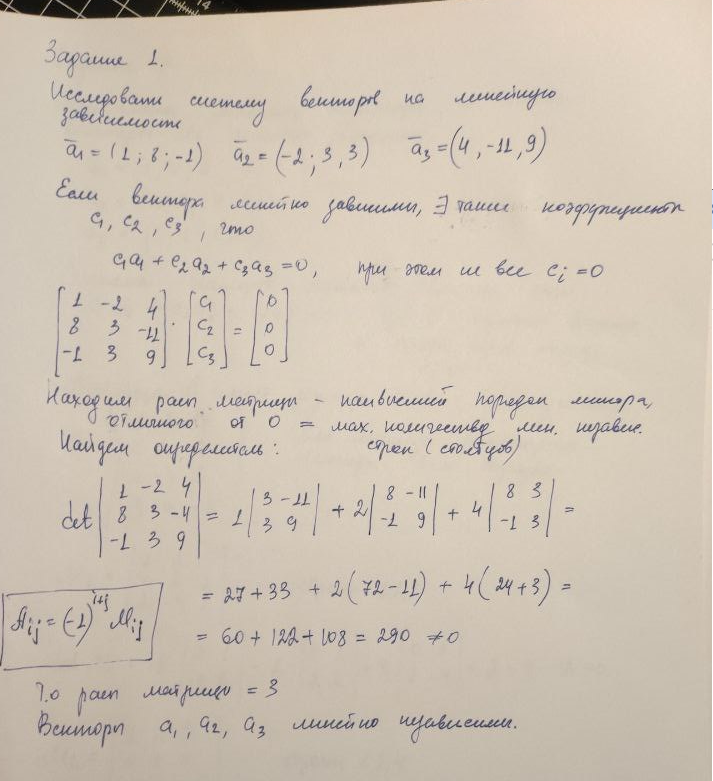

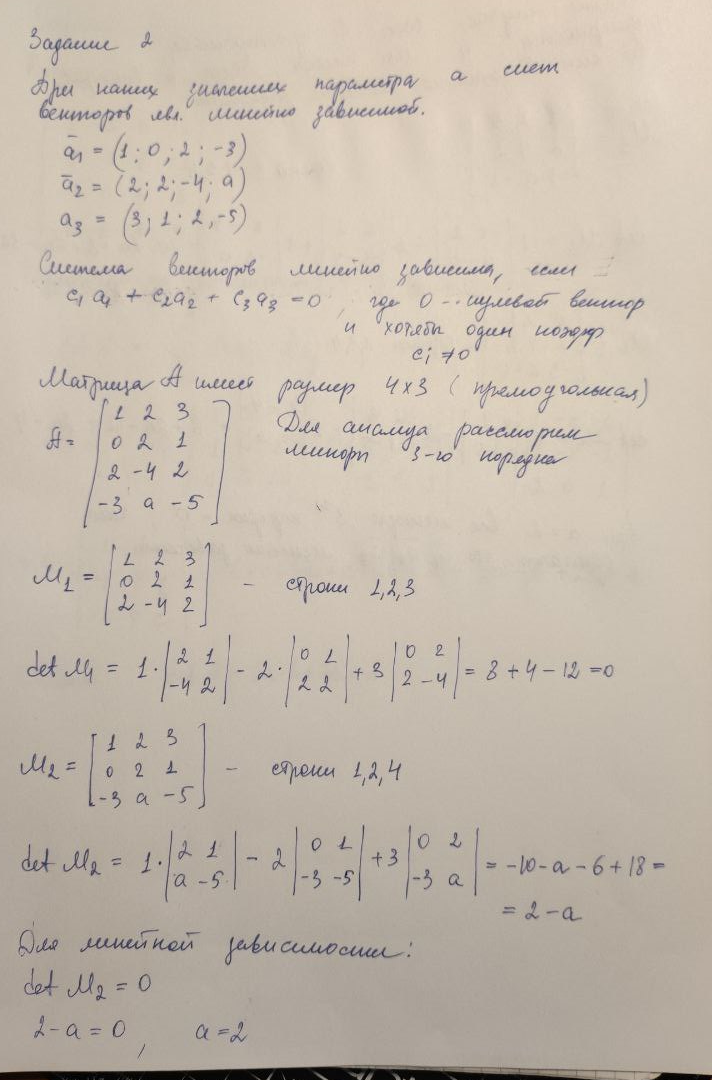

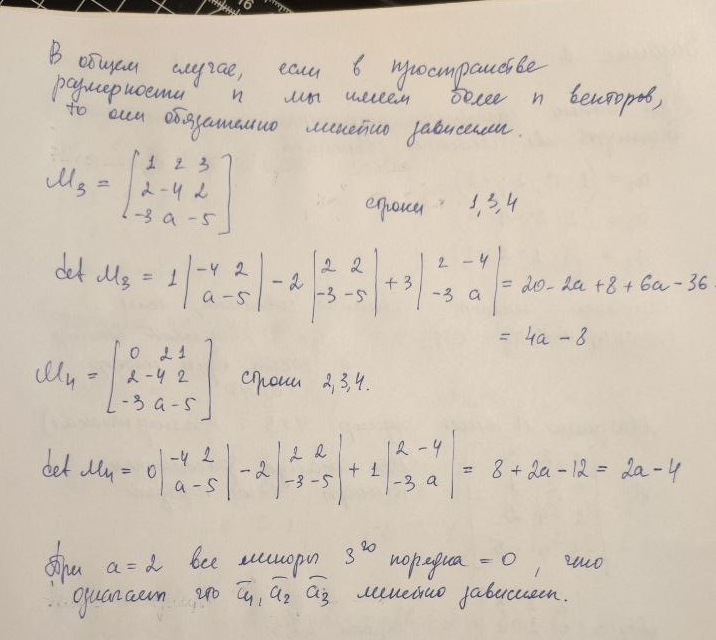

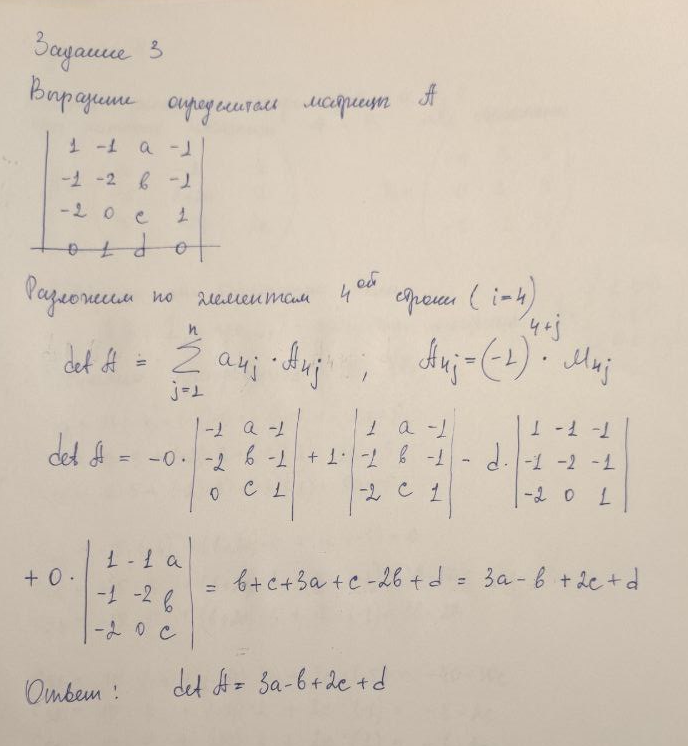

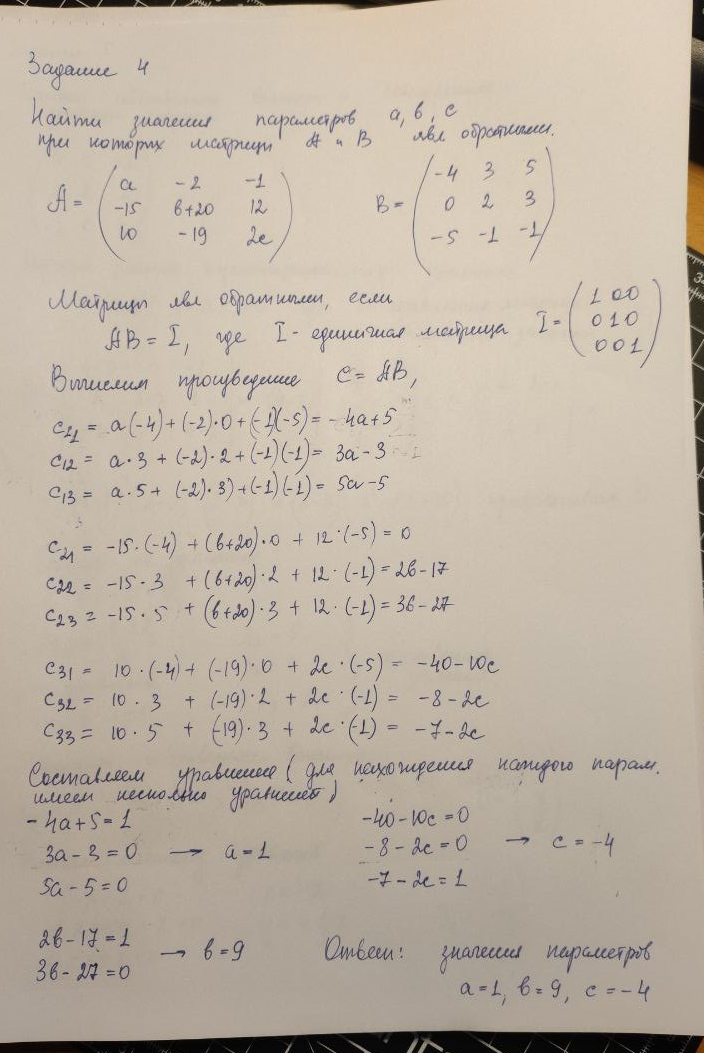

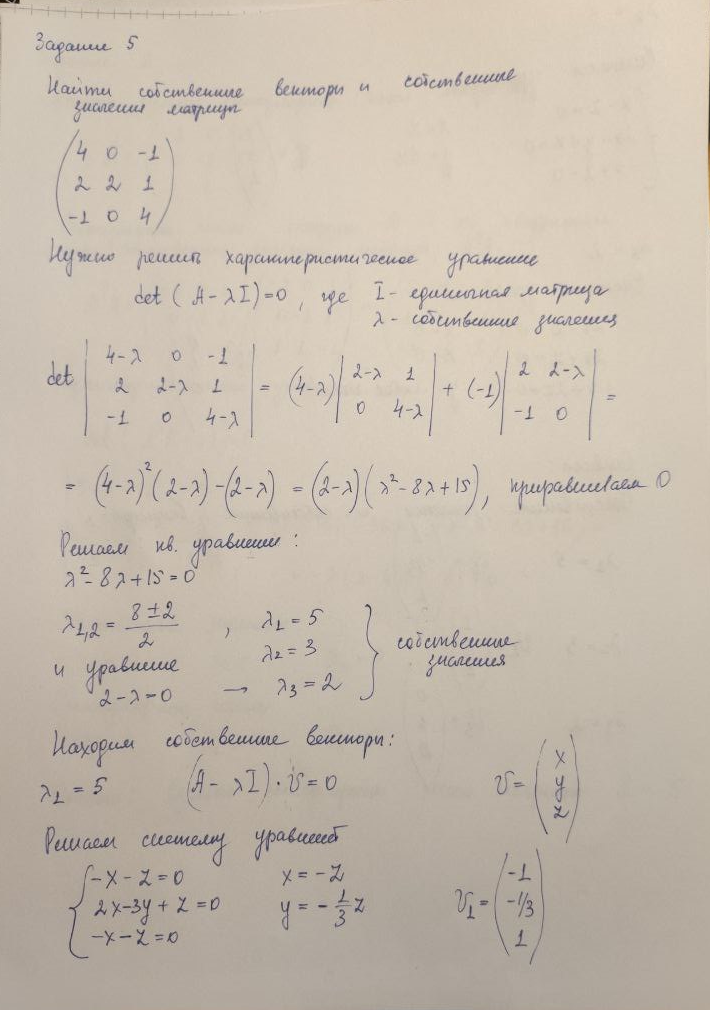

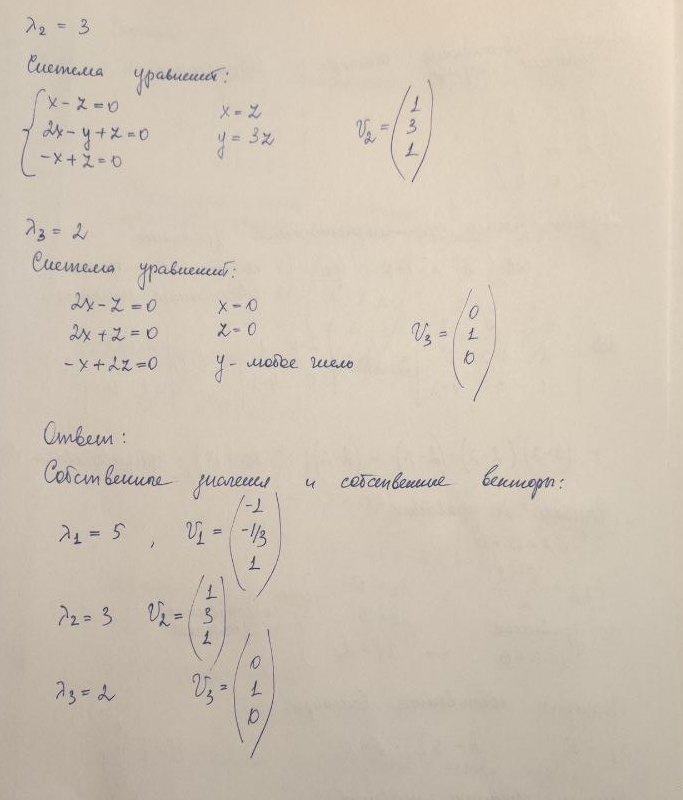

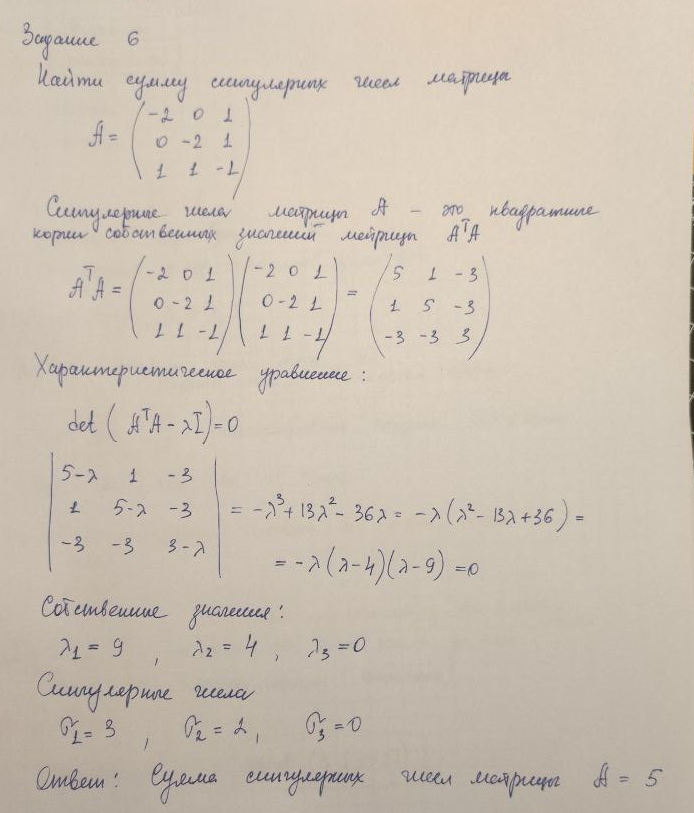

Задание 7
Загрузите данные. Изучите, есть ли в них пропущенные значения? Распишите решение с помощью кода на языке Python и напишите текстом интерпретацию полученного вывода.

Даны данные об аренде велосипедов.

Описание переменных:

season: 1 - весна, 2 - лето, 3 - осень, 4 - зима

yr: 0 - 2011, 1 - 2012

mnth: месяц, от 1 до 12

holiday: 0 - нет праздника, 1 - есть праздник

weekday: день недели, от 0 до 6

workingday: 0 - нерабочий день, 1 - рабочий день

weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)

temp: температура в Цельсиях

atemp: температура по ощущениям в Цельсиях

hum: влажность

windspeed(mph): скорость ветра в милях в час

windspeed(ms): скорость ветра в метрах в секунду

cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_fahrrad = pd.read_csv('asset-v1_SkillFactory+MIFIML-1sem+2024+type@asset+block@bikes_rent.xls')
data_fahrrad.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600

In [11]:
display(data_fahrrad)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
726       1   1    12        0        4           1           2  10.420847   
727       1   1    12        0        5           1           2  10.386653   
728       1   1    12        0        6           0           2  10.386653   
729       1   1    12        0        0           0           1  10.489153   
730       1   1    12        0        1           1           2   8.849153   

        atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0    18.18125  80.5833       10.749882       4.805490   985  
1    17.68695  69.6087       16.652113       7.443949   801  
2     9.47025  43.7273       16.636703       7.437060  1349  
3    10.60610  59.0435       10.739832       4.800998  1562  
4    11.46350  43.6957       12.522300       5.597810  1600  
..        ...      ...             ...            ...   ...  
726  11.33210  65.2917       23.458911      10.486773  2114  
727  12.75230  59.0000       10.416557       4.656485  3095  
728  12.12000  75.2917        8.333661       3.725374  1341  
729  11.58500  48.3333       23.500518      10.505372  1796  
730  11.17435  57.7500       10.374682       4.637766  2729  

[731 rows x 13 columns]

In [12]:
data_fahrrad.isnull().sum()
# пропущенных значений в датасете нет

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

Задание 8

Исследуем данные на наличие линейной зависимости между столбцами. Найдите ранг матрицы данных. Сравните его с количеством столбцов, сделайте вывод. Если линейная зависимость есть - напишите, между какими столбцами и удалите один из них.

Распишите решение с помощью кода на языке Python и напишите текстом интерпретацию полученного вывода.

Ранг корреляционной матрицы: 12
Количество столбцов: 13
Определитель корреляционной матрицы: 5.32790984191288e-19


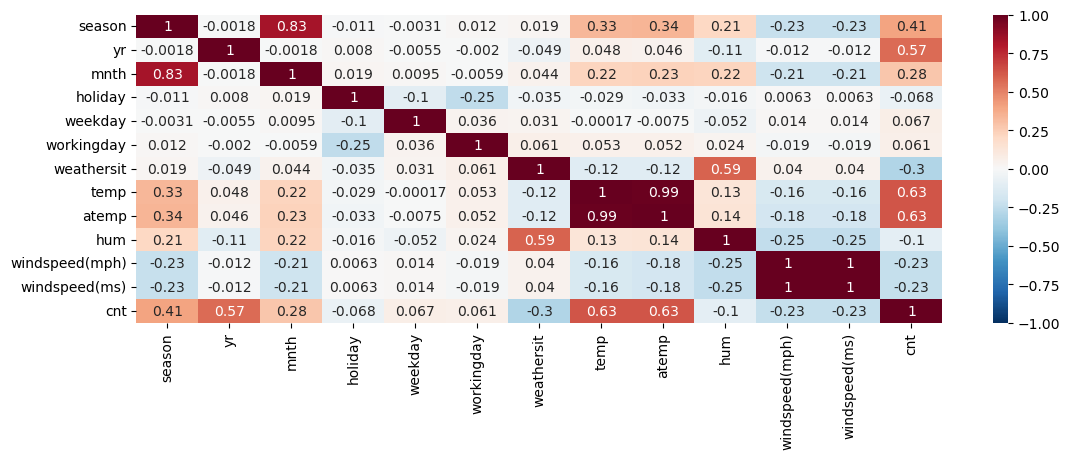

In [14]:
corr_matrix = data_fahrrad.corr()           # получaем таблицу коэффициентов корреляции (матрицу корреляций):

rang = np.linalg.matrix_rank(corr_matrix)   # ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', rang)
print("Количество столбцов:", corr_matrix.select_dtypes(include=[np.number]).shape[1])

# Рассчитываем определитель корреляционной матрицы
determinant = np.linalg.det(corr_matrix)
print('Определитель корреляционной матрицы:', determinant)

# рисуем тепловую карту
plt.figure(figsize=(13,4))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True, vmin=-1, vmax=1); 

Ранг матрицы = 12, количество столбцов - 13, что свидетельствует о наличии линейно зависимых переменных.
1) windspeed(mph) и windspeed(ms): корреляция 1.0 — полная зависимость. Фактически это одни и теже данные в ращзных системах измерений. Оставляем данные в метрической системе (м/с) - windspeed(ms) и удаляем столбец windspeed(mph)
2) temp(температура в Цельсиях) и atemp(температура по ощущениям): корреляция 0.991702. 

In [16]:
# Удаляем windspeed(mph)
data_fahrrad_clean = data_fahrrad.drop(['windspeed(mph)'], axis=1)
display(data_fahrrad_clean)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
726       1   1    12        0        4           1           2  10.420847   
727       1   1    12        0        5           1           2  10.386653   
728       1   1    12        0        6           0           2  10.386653   
729       1   1    12        0        0           0           1  10.489153   
730       1   1    12        0        1           1           2   8.849153   

        atemp      hum  windspeed(ms)   cnt  
0    18.18125  80.5833       4.805490   985  
1    17.68695  69.6087       7.443949   801  
2     9.47025  43.7273       7.437060  1349  
3    10.60610  59.0435       4.800998  1562  
4    11.46350  43.6957       5.597810  1600  
..        ...      ...            ...   ...  
726  11.33210  65.2917      10.486773  2114  
727  12.75230  59.0000       4.656485  3095  
728  12.12000  75.2917       3.725374  1341  
729  11.58500  48.3333      10.505372  1796  
730  11.17435  57.7500       4.637766  2729  

[731 rows x 12 columns]

Задание 9
Выведите корреляционную матрицу оставшихся переменных.

Какая переменная сильнее всего коррелирует с целевой? 

Есть ли мультиколлинеарность? Между какими переменными? Если есть корреляция выше 0.9 - оставьте только 1 признак. 

Объясните выбор Распишите решение с помощью кода на языке Python и напишите текстом интерпретацию полученного вывода.

Ранг корреляционной матрицы: 12
Количество столбцов: 12
Определитель корреляционной матрицы: 0.0003691503504457472


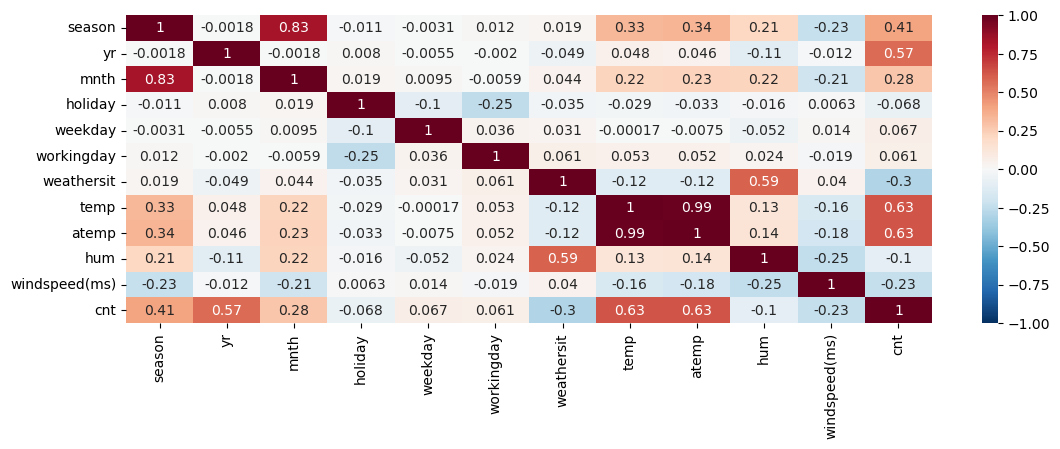

In [18]:
# получaем таблицу коэффициентов корреляции (матрицу корреляций):
corr_matrix_clean = data_fahrrad_clean.corr()

# ранг корреляционной матрицы
rang = np.linalg.matrix_rank(corr_matrix_clean)
print('Ранг корреляционной матрицы:', rang)
print("Количество столбцов:", corr_matrix_clean.select_dtypes(include=[np.number]).shape[1])

# Рассчитываем определитель корреляционной матрицы
determinant = np.linalg.det(corr_matrix_clean)
print('Определитель корреляционной матрицы:', determinant)

# рисуем тепловую карту
plt.figure(figsize=(13,4))
sns.heatmap(corr_matrix_clean, cmap='RdBu_r', annot=True, vmin=-1, vmax=1); 

In [19]:
# temp(температура в Цельсиях) и atemp(температура по ощущениям): корреляция 0.991702. 
# Оставляем объективный пераметр - temp(температура в Цельсиях) и удалим atemp.
del data_fahrrad_clean["atemp"]

In [20]:
data_fahrrad_clean.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

       hum  windspeed(ms)   cnt  
0  80.5833       4.805490   985  
1  69.6087       7.443949   801  
2  43.7273       7.437060  1349  
3  59.0435       4.800998  1562  
4  43.6957       5.597810  1600

In [21]:
print("\nКорреляции с целевой переменной 'cnt':")
corr_matrix_clean["cnt"].to_frame().sort_values(by="cnt")


Корреляции с целевой переменной 'cnt':


cnt
weathersit    -0.297391
windspeed(ms) -0.234545
hum           -0.100659
holiday       -0.068348
workingday     0.061156
weekday        0.067443
mnth           0.279977
season         0.406100
yr             0.566710
temp           0.627494
atemp          0.631066
cnt            1.000000

Задание 10
Разделите данные на предикторы и целевую переменную. Обучите модель с помощью классической линейной регрессии. Линейную регрессию необходимо реализовать без готовых библиотек.

Оцените качество модели с помощью хотя бы двух метрик качества.

Распишите решение с помощью кода на языке Python и напишите текстом интерпретацию полученного вывода.

In [23]:
X = data_fahrrad_clean.drop(columns=["cnt"], axis=1)  # все переменные, кроме целевой переменной
y = data_fahrrad_clean["cnt"]  # целевая переменная

In [24]:
X = np.c_[np.ones(X.shape[0]), X]  # Добавляем столбец единиц для свободного члена

X = np.array(X)
y = np.array(y)

# строим модель линейной регрессии (метод наименьших квадратов )
w_koef = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'Kоэффициенты модели линейной регрессии: {np.round(w_koef, 0)}')

Kоэффициенты модели линейной регрессии: [1626.  515. 2041.  -40. -537.   67.  119. -622.  126.  -10.  -91.]


In [25]:
# Вычисляем коэф. корреляции
correlation = data_fahrrad_clean.corr()['cnt'].drop('cnt')
# сравниваем
compare = pd.DataFrame({
    'Корреляция': correlation,
    'Коэф.регрессии': w_koef[1:]  # без интерсета
}, index=correlation.index)
print(compare)

               Корреляция  Коэф.регрессии
season           0.406100      515.236429
yr               0.566710     2040.882515
mnth             0.279977      -39.805458
holiday         -0.068348     -536.840583
weekday          0.067443       67.211181
workingday       0.061156      119.211640
weathersit      -0.297391     -622.291550
temp             0.627494      125.712692
hum             -0.100659       -9.601506
windspeed(ms)   -0.234545      -91.163587


In [26]:
# Прогноз 
y_pred = X @ w_koef
# Расчет метрик
mae = np.abs(y - y_pred).mean()   # Среднее абсолютное отклонение (MAE) реальных данных от прогноза
mse = np.mean((y - y_pred) ** 2)  # Среднее квадратическое отклонение (MSE)
ss_tot = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2_score = 1 - (ss_res / ss_tot)  # Коэффициент детерминации

print(f'Среднее абсолютное отклонение (MAE) = {mae}')
print(f'Среднее квадратическое отклонение (MSE) = {mse}')


Среднее абсолютное отклонение (MAE) = 648.7802547417028
Среднее квадратическое отклонение (MSE) = 753878.6752929662


MAE (средняя абсолютная ошибка) показывает близость предсказаний к фактическим значениями. 
Высокое значение MSE может быть связано с наличием выбросов, т.к.возведение в квадрат существенно увеличивает те значения, которые лежат далеко от всех остальных. 